# Lab-3 project - Vehicle Data Analysis and Visualization
### Team member(s):
- Orchlon Chinbat (50291063)
### Submission date:
- 10/19/2026

## Introduction
We are working with a large CSV file containing traffic violation records from Washington, D.C., covering the years 2013 to 2016. The dataset consists of 803,060 entries in total. Our goal is to analyze this data and present the results through various charts and graphs.

During the analysis phase, we will identify the vehicle with the 6th newest model year (along with its maximum year and price) and the one with the 4th oldest model year (along with its minimum year and price). We will also detect and count all missing values, display them, and save the cleaned data into a new CSV file.

After cleaning, we will create at least five distinct visualizations to highlight statistical insights and key findings. These graphs may include comparisons such as maximum year or price against vehicle make or model, with each visualization accompanied by a markdown explanation describing what it represents.


# Part 1: Data analysis

### Find the 6th newest production year among all vehicles, then within that year, determine the vehicle(s) that have the highest price.

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('vehicles_data.csv', encoding = "ISO-8859-1")

# Convert Year to numeric, coercing errors to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter out unrealistic years (keep only years between 1900 and 2025)
df_year_clean = df[(df['Year'] >= 1900) & (df['Year'] <= 2025)].copy()

# We already cleaned up the years, but it is not unique and sorted. So make it unique and sorted.
df_sorted_unique_years = sorted(df_year_clean['Year'].unique(), reverse=True)

# Get the 6th newest year
sixth_newest_year = df_sorted_unique_years[5]
sixth_newest_year


/var/folders/tp/hsjvvm555fxbfhgx00h95ymm0000gn/T/ipykernel_9148/133203310.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicles_data.csv', encoding = "ISO-8859-1")


np.float64(2020.0)

We found the 6th newest year, now we need to find the vehicle(s) with the highest price in that year.

In [2]:
# Find the vehicle(s) with the highest price in the 6th newest year
sixth_newest_year_cars_df = df_year_clean[(df_year_clean['Year'] == sixth_newest_year)]

# Find the maximum price for vehicles of this year
sixth_newest_most_expensive = sixth_newest_year_cars_df['Price'].max()

# Find the vehicle(s) with the maximum price
sixth_newest_expensive_df = sixth_newest_year_cars_df[(sixth_newest_year_cars_df['Price'] == sixth_newest_most_expensive)]

sixth_newest_expensive_df


,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
103322,8/23/15,21:53:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,RIVER RD / CARDEROCK SPRINGS DR,02 - Automobile,2020.0,HONDA,CIVI,SILVER,Warning,BLACK,M,9322.0


### Identify the vehicle(s) with the 4th oldest production year and determining their minimum price.

In [3]:
# Find 4th oldest year
fourth_oldest_year = sorted(df_year_clean['Year'].unique(), reverse=False)[3]

# Find the vehicle(s) with the 4th oldest production year
fourth_oldest_cars_df = df_year_clean[(df_year_clean['Year'] == fourth_oldest_year)]

# Find the minimum price for vehicles of this year
fourth_oldest_min_price = fourth_oldest_cars_df['Price'].min()

# Find the vehicle(s) with the minimum price
fourth_min_price_car_df = fourth_oldest_cars_df[(fourth_oldest_cars_df['Price'] == fourth_oldest_min_price)]

fourth_min_price_car_df

,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
746093,3/24/14,22:11:00,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,GEORGIA AND UNIVERSITY BLVD,02 - Automobile,1925.0,HONDA,CIVIC,GRAY,Warning,WHITE,F,500.0


### Identify and count the number of missing values.

In [4]:
# Count missing values for each column
missing_values = df.isnull().sum()
# Calculate the percentage of missing values for each column
missing_percentage = ((df.isnull().sum() / len(df)) * 100).round(2)

# Calculate the total number of missing values
total_missing_value = missing_values.sum()

# Find the rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]


### Converting all my findings into a data frame table and printing it.

In [5]:
# Create separate CSV files for different analysis results

# 1. Vehicle Analysis Results (6th newest and 4th oldest)
vehicle_results = []

# Add 6th newest vehicle information
for idx, row in sixth_newest_expensive_df.iterrows():
    vehicle_results.append({
        'Analysis_Type': '6th Newest Year - Most Expensive',
        'Vehicle_Type': row['VehicleType'],
        'Make': row['Make'],
        'Year': row['Year'],
        'Model': row['Model'],
        'Color': row['Color'],
        'Price': row['Price'],
        'Year_Rank': '6th Newest',
    })

# Add 4th oldest vehicle information
for idx, row in fourth_min_price_car_df.iterrows():
    vehicle_results.append({
        'Analysis_Type': '4th Oldest Year - Least Expensive',
        'Vehicle_Type': row['VehicleType'],
        'Make': row['Make'],
        'Year': row['Year'],
        'Model': row['Model'],
        'Color': row['Color'],
        'Price': row['Price'],
        'Year_Rank': '4th Oldest',
    })

# Create vehicle analysis dataframe
vehicle_df = pd.DataFrame(vehicle_results)

# 2. Missing Values Analysis Results
missing_results = []

# Add missing values summary for each column
for col, missing_count, missing_pct in zip(missing_values.index, missing_values.values, missing_percentage.values):
    missing_results.append({
        'Column_Name': col,
        'Missing_Count': missing_count,
        'Missing_Percentage': missing_pct,
        'Total_Records': len(df),
        'Complete_Records': len(df) - missing_count,
    })

# Add overall summary
missing_results.append({
    'Column_Name': 'TOTAL_DATASET',
    'Missing_Count': total_missing_value,
    'Missing_Percentage': round((total_missing_value / (len(df) * len(df.columns))) * 100, 2),
    'Total_Records': len(df),
    'Complete_Records': len(df) - total_missing_value,
})

# Create missing values dataframe
missing_df = pd.DataFrame(missing_results)


# Display preview of both files
print("\nVEHICLE ANALYSIS PREVIEW")
print(vehicle_df.to_string(index=False))

print("\n\nMISSING VALUES ANALYSIS PREVIEW")
print(missing_df.to_string(index=False))



VEHICLE ANALYSIS PREVIEW
                    Analysis_Type    Vehicle_Type  Make   Year Model  Color  Price  Year_Rank
 6th Newest Year - Most Expensive 02 - Automobile HONDA 2020.0  CIVI SILVER 9322.0 6th Newest
4th Oldest Year - Least Expensive 02 - Automobile HONDA 1925.0 CIVIC   GRAY  500.0 4th Oldest


MISSING VALUES ANALYSIS PREVIEW
   Column_Name  Missing_Count  Missing_Percentage  Total_Records  Complete_Records
  Date Of Stop              0                0.00         803889            803889
  Time Of Stop              0                0.00         803889            803889
   Description              5                0.00         803889            803884
      Location            831                0.10         803889            803058
   VehicleType            829                0.10         803889            803060
          Year           6844                0.85         803889            797045
          Make            872                0.11         803889            8

### Save the analysis results to CSV file

In [6]:
# Create separate CSV files for different analysis results

# 1. Vehicle Analysis Results (6th newest and 4th oldest)
vehicle_results = []

# Add 6th newest vehicle information
for idx, row in sixth_newest_expensive_df.iterrows():
    vehicle_results.append({
        'Analysis_Type': '6th Newest Year - Most Expensive',
        'Vehicle_Type': row['VehicleType'],
        'Make': row['Make'],
        'Year': row['Year'],
        'Model': row['Model'],
        'Color': row['Color'],
        'Price': row['Price'],
    })

# Add 4th oldest vehicle information
for idx, row in fourth_min_price_car_df.iterrows():
    vehicle_results.append({
        'Analysis_Type': '4th Oldest Year - Least Expensive',
        'Vehicle_Type': row['VehicleType'],
        'Make': row['Make'],
        'Year': row['Year'],
        'Model': row['Model'],
        'Color': row['Color'],
        'Price': row['Price'],
    })

# Create vehicle analysis dataframe
vehicle_df = pd.DataFrame(vehicle_results)

# 2. Missing Values Analysis Results
missing_results = []

# Add missing values summary for each column
for col, missing_count, missing_pct in zip(missing_values.index, missing_values.values, missing_percentage.values):
    missing_results.append({
        'Column_Name': col,
        'Missing_Count': missing_count,
        'Missing_Percentage': missing_pct,
        'Total_Records': len(df),
        'Complete_Records': len(df) - missing_count,
    })

# Add overall summary
missing_results.append({
    'Column_Name': 'TOTAL_DATASET',
    'Missing_Count': total_missing_value,
    'Missing_Percentage': round((total_missing_value / (len(df) * len(df.columns))) * 100, 2),
    'Total_Records': len(df),
    'Complete_Records': len(df) - total_missing_value,
})

# Create missing values dataframe
missing_df = pd.DataFrame(missing_results)

# Save both files
vehicle_df.to_csv('lab3_vehicle_analysis.csv', index=False)
missing_df.to_csv('lab3_missing_values_analysis.csv', index=False)

print("Vehicle analysis results saved to 'lab3_vehicle_analysis.csv'")
print("Missing values analysis saved to 'lab3_missing_values_analysis.csv'")


Vehicle analysis results saved to 'lab3_vehicle_analysis.csv'
Missing values analysis saved to 'lab3_missing_values_analysis.csv'


# Part 2: Data Visualization

### Graph 1: Show the races in pie chart.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('vehicles_data.csv', encoding = "ISO-8859-1")

# Get the original race list (contains integers and descriptive values)
race_list = df['Race'].value_counts()

# Clean up the race_list by filtering out numeric race codes
valid_races = ['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'OTHER']
race_list_cleaned = race_list[race_list.index.isin(valid_races)]

print("\nCleaned race_list (only meaningful categories):")
print(race_list_cleaned)


Cleaned race_list (only meaningful categories):
Race
WHITE       293405
BLACK       250510
HISPANIC    167367
ASIAN        47373
OTHER        41290
Name: count, dtype: int64


/var/folders/tp/hsjvvm555fxbfhgx00h95ymm0000gn/T/ipykernel_7248/2869330655.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicles_data.csv', encoding = "ISO-8859-1")


['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'OTHER']
[np.int64(293405), np.int64(250510), np.int64(167367), np.int64(47373), np.int64(41290)]


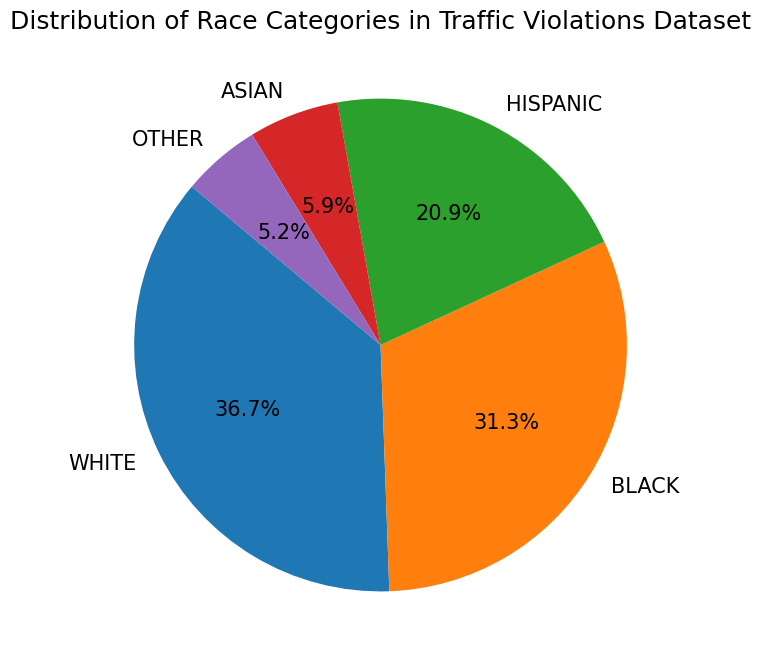

In [29]:
races = list(race_list_cleaned.keys())
race_counts = [race_list_cleaned[race] for race in races]
print(races)
print(race_counts)

# Creating a pie chart
plt.figure(figsize=(8,8))
# Pie chart code:
plt.pie(race_counts, labels=races, autopct="%1.1f%%", startangle=140, textprops={'fontsize':15})

plt.title('Distribution of Race Categories in Traffic Violations Dataset', fontsize=18)
plt.show()

### Graph 2: Top 5 car brands that does violations.

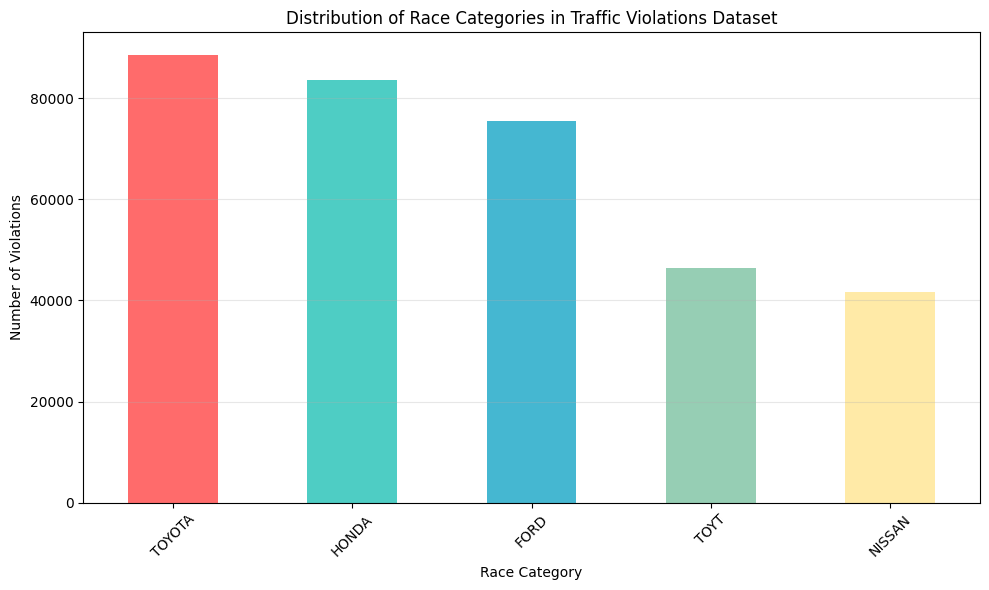


Race Category Summary:
TOYOTA: 88,623 violations (26.4%)
HONDA: 83,634 violations (24.9%)
FORD: 75,452 violations (22.5%)
TOYT: 46,458 violations (13.8%)
NISSAN: 41,659 violations (12.4%)


In [31]:
clean_cars = df['Make'].value_counts()[:5]
# Create a visualization with the cleaned race data

plt.figure(figsize=(10, 6))
clean_cars.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Distribution of Race Categories in Traffic Violations Dataset')
plt.xlabel('Race Category')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display summary statistics
print("\nRace Category Summary:")
for race, count in clean_cars.items():
    percentage = (count / clean_cars.sum()) * 100
    print(f"{race}: {count:,} violations ({percentage:.1f}%)")


### Graph 3: Line Plots for Vehicle Year vs. Price distribution

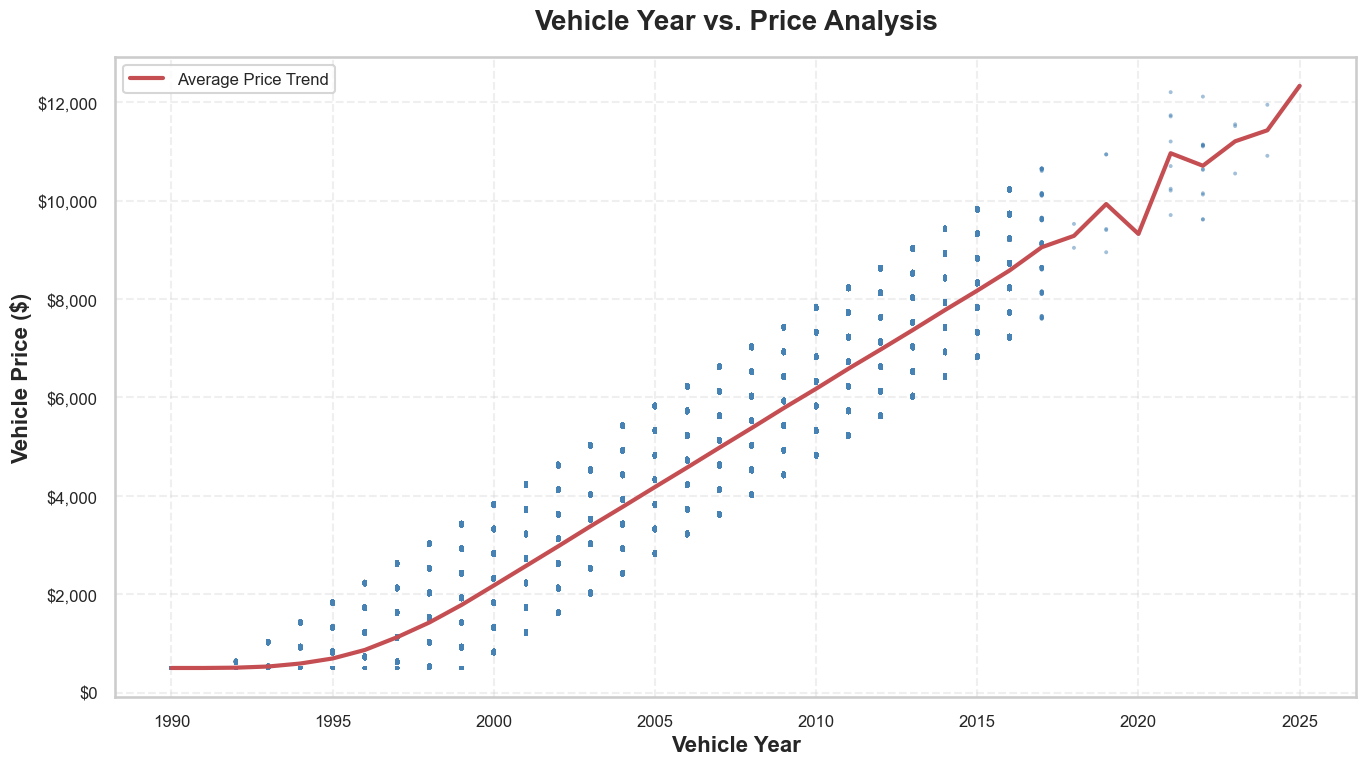

In [32]:
plt.figure(figsize=(14, 8))

# Convert Year to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Remove rows with missing Year or Price
df_clean = df.dropna(subset=['Year', 'Price']).copy()

# Filter realistic years and prices
df_clean = df_clean[
    (df_clean['Year'] >= 1990) & 
    (df_clean['Year'] <= 2025) &
    (df_clean['Price'] > 0) & 
    (df_clean['Price'] < 50000)
].copy()

# Create scatter plot
plt.scatter(df_clean['Year'], df_clean['Price'], 
           alpha=0.5, color='steelblue', s=8, edgecolors='none')

# Add trend line using simple linear regression
years_sorted = sorted(df_clean['Year'].unique())
mean_prices = []
for year in years_sorted:
    year_data = df_clean[df_clean['Year'] == year]
    mean_prices.append(year_data['Price'].mean())

plt.plot(years_sorted, mean_prices, 'r-', linewidth=3, label='Average Price Trend')

# Customize the plot
plt.title('Vehicle Year vs. Price Analysis', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Vehicle Year', fontsize=16, fontweight='bold')
plt.ylabel('Vehicle Price ($)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

# Format axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Graph 4: Warning vs. Citation violations from 2013 to 2016

/var/folders/tp/hsjvvm555fxbfhgx00h95ymm0000gn/T/ipykernel_7248/658344518.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Date Of Stop'] = pd.to_datetime(df_clean['Date Of Stop'], errors='coerce')


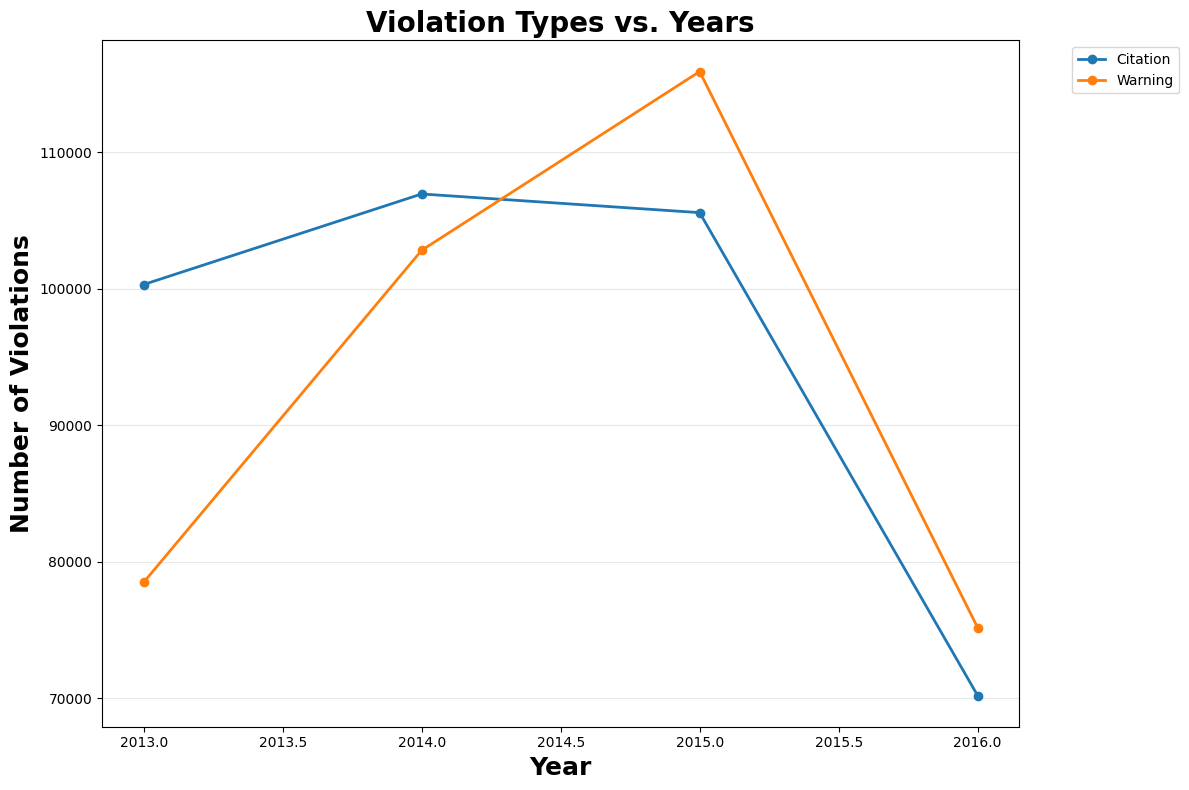

In [66]:
# Clean the data and prepare for violation type analysis
df_clean = df.dropna(subset=['Violation Type', 'Date Of Stop']).copy()

# Convert Date Of Stop to datetime
df_clean['Date Of Stop'] = pd.to_datetime(df_clean['Date Of Stop'], errors='coerce')

# Extract year from the date
df_clean['Year'] = df_clean['Date Of Stop'].dt.year

# Filter realistic years (2013-2016 based on the dataset description)
df_clean = df_clean[(df_clean['Year'] >= 2013) & (df_clean['Year'] <= 2016)].copy()

# Get the top violation types by frequency
top_violations = df_clean['Violation Type'].value_counts().head()[:2]

# Create a pivot table to get violation counts by year and violation type
violation_yearly = df_clean.groupby(['Year', 'Violation Type']).size().unstack(fill_value=0)

# Keep only the top violation types
violation_yearly = violation_yearly[top_violations.index]

# Creating a line graph
plt.figure(figsize=(12, 8))

for violation_type in violation_yearly.columns:
    plt.plot(violation_yearly.index, violation_yearly[violation_type], '-', 
             label=violation_type, linewidth=2, marker='o', markersize=6)

plt.title('Violation Types vs. Years', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=18, fontweight='bold')
plt.ylabel('Number of Violations', fontsize=18, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()